# 기초통계와 인사이트 도출
## 데이터 인사이트 도출 실습 과정입니다.

* 지금부터 확률변수 기반 데이터 인사이트 도출 템플릿에 맞춰서 탐색을 진행하겠습니다.

* 고객 해지 예측을 위한 가상 데이터셋을 만들어보겠습니다.
* 단, 만들어진 데이터는 표본이 아닌 모수 데이터라고 가정하겠습니다.
* A통신사에서는 다음과 같은 변수들이 고객 해지에 영향을 미칠 것으로 판단되어 데이터를 수집하였습니다.

    * company_names: 상가이름
    * industries: 업종
    * areas: 면적
    * rents: 임대료
    * durations: 영업기간(년)

In [5]:
import random
import pandas as pd

def generate_fake_data(num_data):
    # 변수 리스트
    company_names = ['A상가', 'B상가', 'C상가', 'D상가', 'E상가']
    industries = ['음식점', '카페', '의류', '서적', '안경점']
    areas = [30, 40, 50, 60, 70]
    rents = [1000000, 2000000, 3000000, 4000000, 5000000]
    durations = [1, 2, 3, 4, 5]
    # 데이터 생성
    data = []
    for i in range(num_data):
        company_name = random.choice(company_names)
        industry = random.choice(industries)
        area = random.choice(areas)
        rent = random.choice(rents)
        duration = random.choice(durations)
        data.append({
            'company_name': company_name,
            'industry': industry,
            'area': area,
            'rent': rent,
            'duration': duration
        })
    return data

# 가짜 데이터 생성
fake_data = generate_fake_data(1000)

# 데이터프레임 생성
df = pd.DataFrame(fake_data)

#### 1. 기초통계량 확인
* describe으로 확인하기
* 평균과 중앙값 비교하기
* 최대, 최소값으로 범위 확인하기

In [11]:
df.head()

,company_name,industry,area,rent,duration
0,A상가,안경점,30,5000000,3
1,E상가,음식점,70,2000000,3
2,D상가,서적,50,4000000,3
3,B상가,카페,60,1000000,4
4,B상가,안경점,40,4000000,3


In [6]:
df.describe()

,area,rent,duration
count,1000.000000,1.000000e+03,1000.000000
mean,49.890000,2.967000e+06,3.135000
std,14.328056,1.418423e+06,1.389498
min,30.000000,1.000000e+06,1.000000
25%,40.000000,2.000000e+06,2.000000
50%,50.000000,3.000000e+06,3.000000
75%,60.000000,4.000000e+06,4.000000
max,70.000000,5.000000e+06,5.000000


#### 2. 데이터 시각화

In [7]:
# 먼저 시각화를 위해서 plotly를 설치하겠습니다.
!pip install plotly

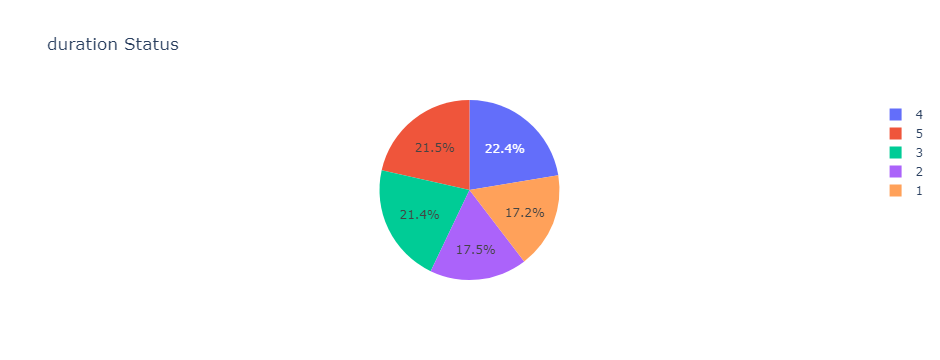

In [8]:
# 데이터 균형 확인하기 : pie chart 그리기
import pandas as pd
import plotly.graph_objects as go

# 파이차트 데이터 생성
duration_count = df['duration'].value_counts()
labels = ['1', '2', '3', '4', '5']
values = [duration_count[1], duration_count[2], duration_count[3],
         duration_count[4], duration_count[5]]

# 파이차트 생성 및 레이아웃 설정
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='duration Status')

# 그래프 출력
fig.show()

[문제]
1. 데이터가 불균형한가요?(일반적으로는 특정 클래스의 비율이 10% 이하)
2. 불균형하다면 어떻게 처리할껀가요?

* 만약에 데이터가 너무 불균형하다면 UnderSampling 또는 OverSampling 등의 방법으로 균형을 맞출 수 있습니다.

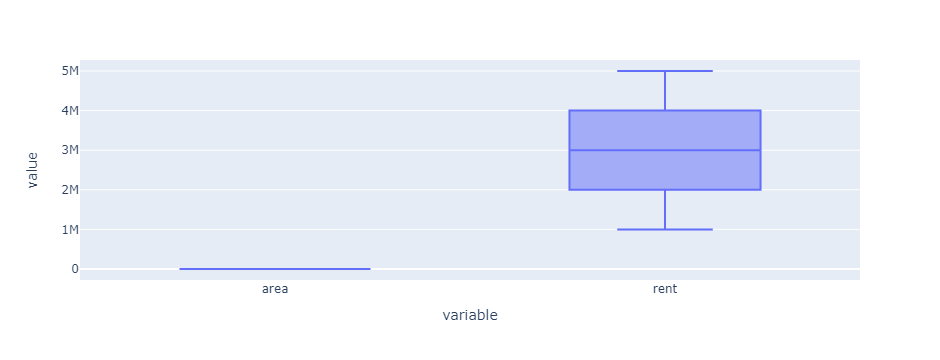

In [9]:
# 이상치 box plot으로 확인하기
import plotly.express as px
import seaborn as sns

data = df[['area', 'rent']]

fig = px.box(data)
fig.show()

[문제]
1. 이상치가 존재하나요?
2. 이상치가 존재한다면 어떻게 처리할 것인가요?

* 만약에 극단적인 이상치의 영향을 많이 받는다는 판단이 든다면 해당 데이터를 걸러낼 수도 있습니다.

* 질적변수를 기준으로 파이 그래프 그리기

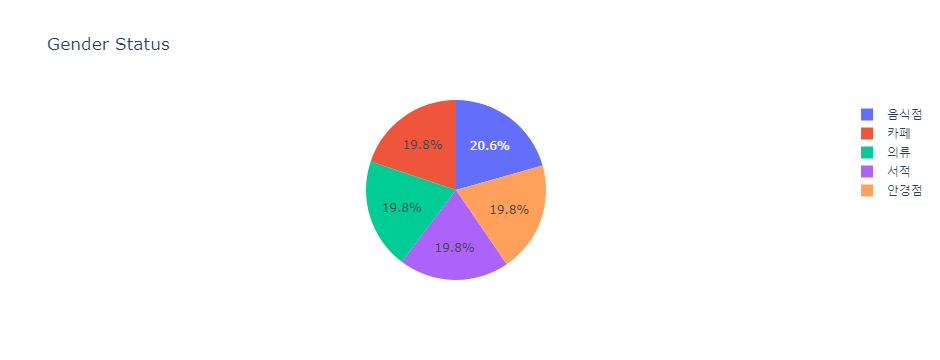

In [12]:
# industries
# 데이터 균형 확인하기 : pie chart 그리기
import pandas as pd
import plotly.graph_objects as go

# 파이차트 데이터 생성
# industries_count = df['industries'].value_counts()
industries_count = df['industry'].value_counts()
labels = ['음식점', '카페', '의류', '서적', '안경점']
values = [industries_count[0], industries_count[1],industries_count[1],
         industries_count[1],industries_count[1]]

# 파이차트 생성 및 레이아웃 설정
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Gender Status')

# 그래프 출력
fig.show()

[문제]
1. Gender 변수 시각화에서 알게된 내용

#### 3. 확률변수 계산하기
* 변수별 확률 변수 계산하기

In [13]:
# 업종과 면적, 임대료에 따른 확률변수 도출
industry_prob = df.groupby('industry').size() / len(df)
area_prob = df.groupby('area').size() / len(df)
rent_prob = df.groupby('rent').size() / len(df)

# 도출된 확률변수 출력
print("Industry Probability:")
print(industry_prob)
print("\nArea Probability:")
print(area_prob)
print("\nRent Probability:")
print(rent_prob)

Industry Probability:
industry
서적     0.218
안경점    0.210
음식점    0.177
의류     0.200
카페     0.195
dtype: float64

Area Probability:
area
30    0.198
40    0.226
50    0.176
60    0.189
70    0.211
dtype: float64

Rent Probability:
rent
1000000    0.201
2000000    0.225
3000000    0.174
4000000    0.206
5000000    0.194
dtype: float64


[문제]

1. 확률변수를 확인하고 알게된 내용

#### 4. 조건에 따른 기대값(해지율) 계산하기
* 업종이 음식점이고 면적이 50, 임대료가 2000000인 상점은 얼마나 오랫동안 영업할 수 있을까?

In [14]:
# 업종이 음식점이고 면적이 50, 임대료가 2000000인 상점 추출
selected_shop = df[(df['area'] == 50) & (df['rent'] == 2000000) & (df['industry'] == '음식점')]

# 추출된 상점 정보 출력
print(selected_shop)

    company_name industry  area     rent  duration
148          B상가      음식점    50  2000000         3
310          C상가      음식점    50  2000000         2
445          A상가      음식점    50  2000000         2
542          C상가      음식점    50  2000000         1
636          C상가      음식점    50  2000000         4
678          B상가      음식점    50  2000000         3


In [15]:
# 각 영업기간별 확률변수 계산
prob_data = []
for i in range(1,6):
    prob_data.append(len(selected_shop[selected_shop['duration']==i])/len(selected_shop))
    print("영업기간",str(i),"확률변수는 ", len(selected_shop[selected_shop['duration']==i])/len(selected_shop))

영업기간 1 확률변수는  0.16666666666666666
영업기간 2 확률변수는  0.3333333333333333
영업기간 3 확률변수는  0.3333333333333333
영업기간 4 확률변수는  0.16666666666666666
영업기간 5 확률변수는  0.0


In [16]:
# 기대값 계산
exp_data = []
for i in range(0,5):
    exp_data.append((i+1)*prob_data[i])
    
sum(exp_data)

2.5

[문제]

1. 다른 조건을 부여해서 기대값을 구해보세요.